In [1]:
# Import packages 
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import math

In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks') 
colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours)
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
# Read in the training data & testing data.  Inspect the training & testing data to ensure we have the appropriate files 
training_data = pd.read_csv('train.csv', index_col=[0])

# Inspect the top of the data 
training_data.head()

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
Id,,,,,,,,,,,,,,,,,,,,,
570,110,f,1,t,-33.744684,151.287888,Apartment,Entire home/apt,4,1.0,...,8.0,6.0,10.0,10.0,8.0,8.0,f,f,flexible,0.04
571,99,t,1,f,-33.793117,151.286795,Apartment,Private room,2,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,flexible,0.80
572,70,f,1,f,-33.718033,151.298931,Apartment,Entire home/apt,4,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,0.09
573,157,f,1,t,-33.802581,151.287691,Apartment,Entire home/apt,3,1.0,...,9.0,8.0,10.0,9.0,8.0,9.0,f,f,strict,0.13
574,120,f,1,f,-33.757136,151.291337,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,NaN


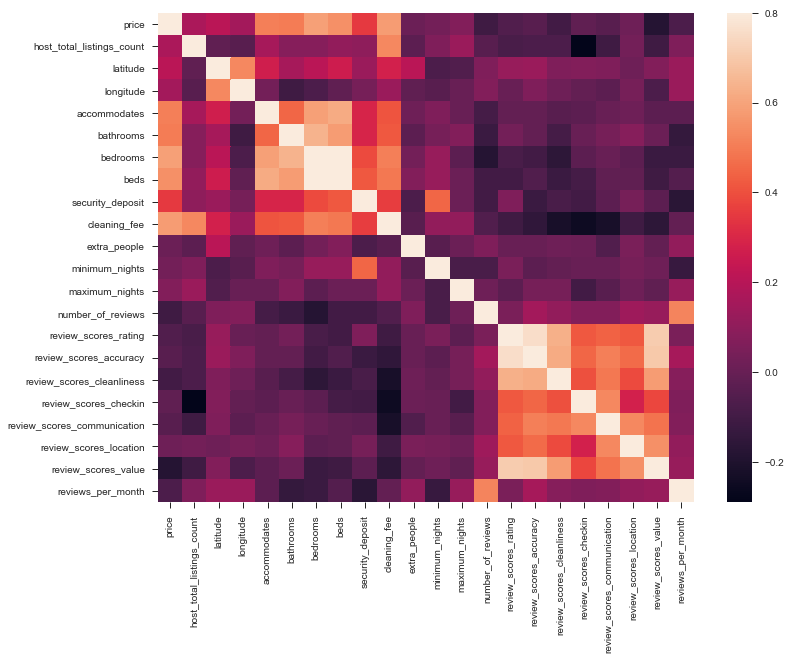

In [4]:
correlation_table = training_data.corr().round(2)
corrmat = correlation_table
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8, square=False);

Higher impact on price: 
- accommodates 
- bathrooms 
- bedrooms 
- beds 

In [5]:
# Transforming host_is_superhost and host_identity_verified to 0-1
training_data['host_is_superhost'] = training_data.host_is_superhost.map({'f':0, 't':1}).replace()
training_data['host_identity_verified'] = training_data.host_identity_verified.map({'f':0, 't':1}).replace()
    
# Get dummies for other columns
training_data = pd.get_dummies(training_data)

In [6]:
# Fill the NA with a numerical value

columns = ["reviews_per_month","security_deposit","cleaning_fee"]

for i in columns:
    training_data[i].fillna(0, inplace = True)

/Users/Tanya/QBUS Assignment/statlearning.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


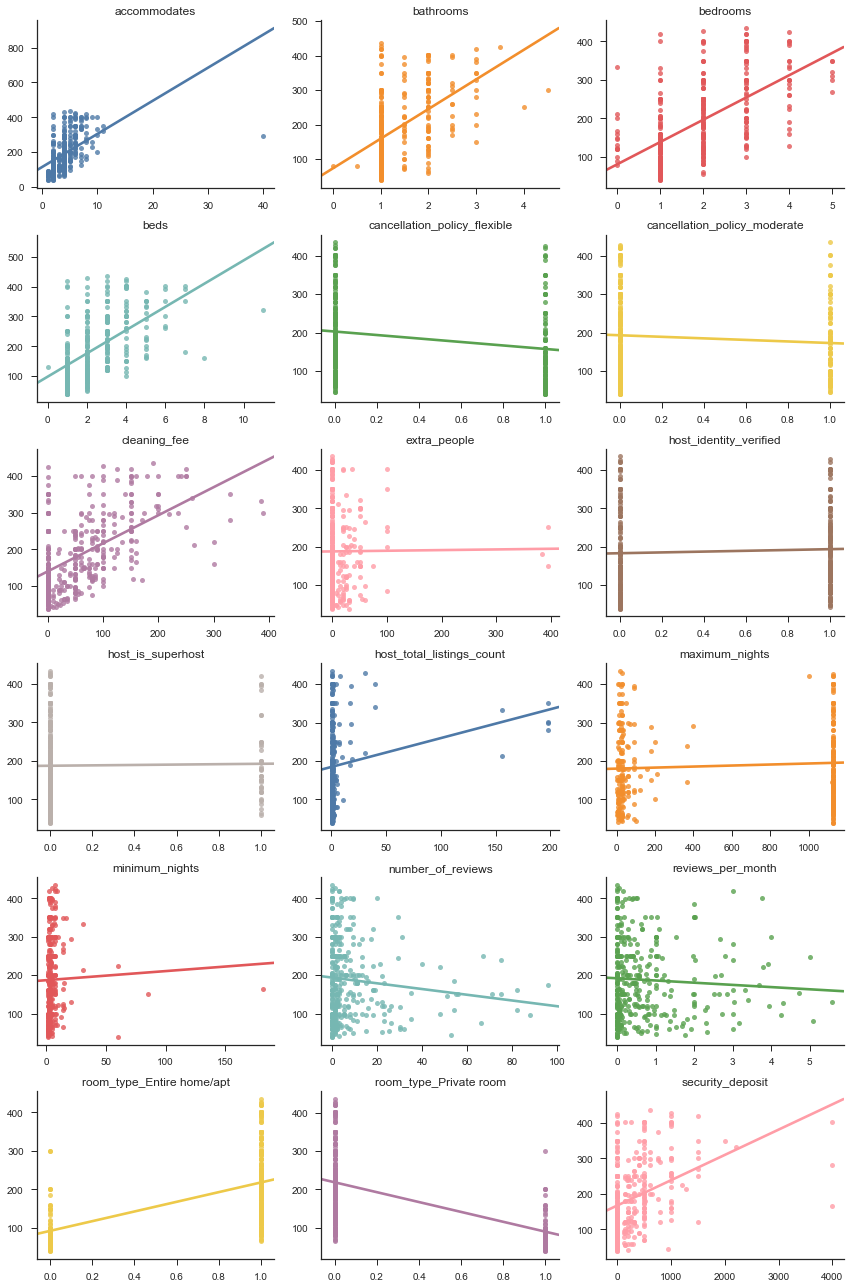

<Figure size 648x432 with 0 Axes>

In [7]:
# Defining the dependent and independent variables and plotting them against eachother
response = 'price'
predictors = ['accommodates', 'bathrooms', 'bedrooms',
       'beds', 'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cleaning_fee', 'extra_people', 'host_identity_verified',
       'host_is_superhost', 'host_total_listings_count', 'maximum_nights',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'room_type_Entire home/apt', 'room_type_Private room',
       'security_deposit']

from statlearning import plot_regressions
with sns.color_palette(crayon):
    plot_regressions(training_data[predictors], training_data[response])
    plt.show()
    plt.savefig('variables.png')

In [8]:
# To gain insight on the distribution of the response 'Sale Prices' by plotting a histogram
from statlearning import plot_histogram
plot_histogram(y_train)
plt.title('Distribution of Sale Prices')
plt.show()

NameError: name 'y_train' is not defined

In [9]:
training_data['price'].describe()

count    383.000000
mean     187.953003
std      101.089214
min       39.000000
25%      100.000000
50%      165.000000
75%      250.000000
max      435.000000
Name: price, dtype: float64

Distribution is right-skewed. Considering that Airbnb mainly caters for individuals who prefer cheaper places for a short duration of stay, this distribution intuitively matches the listings provided.  To compensate the right-skewness, we apply an appropriate transformation to reduce its skewness.

# Applying Transformation to Price

In [10]:
# Apply log transformation to 'price' and include as new column in dataframe
training_data['price_log'] = training_data['price'].apply(lambda x: math.log(x))

In [11]:
training_data.head()

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t,is_business_travel_ready_f,is_business_travel_ready_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,price_log
Id,,,,,,,,,,,,,,,,,,,,,
570,110,0,1,1,-33.744684,151.287888,4,1.0,2,2,...,0,0,1,0,1,0,1,0,0,4.700480
571,99,1,1,0,-33.793117,151.286795,2,1.0,1,1,...,1,0,1,0,1,0,1,0,0,4.595120
572,70,0,1,0,-33.718033,151.298931,4,1.0,1,2,...,0,0,1,0,1,0,0,0,1,4.248495
573,157,0,1,1,-33.802581,151.287691,3,1.0,2,1,...,0,0,1,0,1,0,0,0,1,5.056246
574,120,0,1,0,-33.757136,151.291337,4,1.0,2,2,...,0,0,1,0,1,0,0,1,0,4.787492


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


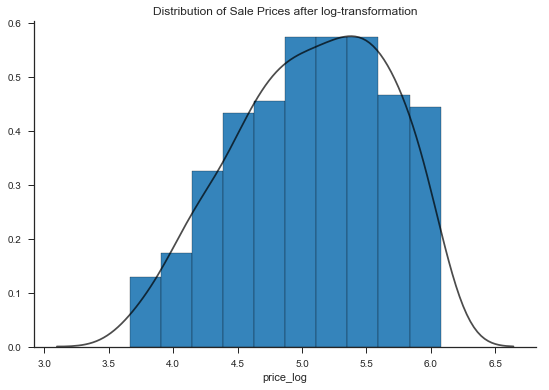

In [12]:
plot_histogram(training_data["price_log"])
plt.title('Distribution of Sale Prices after log-transformation')
plt.show()

In [13]:
training_data["price_log"].describe()

count    383.000000
mean       5.078518
std        0.584512
min        3.663562
25%        4.605170
50%        5.105945
75%        5.521461
max        6.075346
Name: price_log, dtype: float64

# Other Variables

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


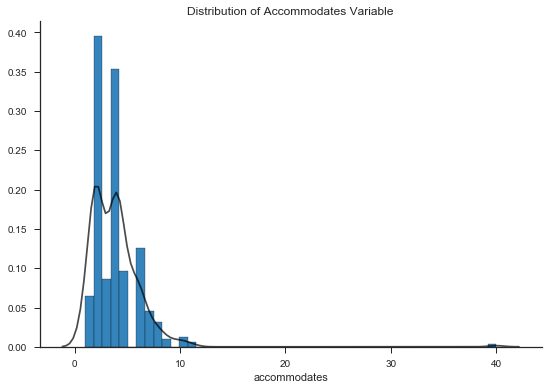

In [14]:
# To gain insight on the distribution of the response 'accommodates' by plotting a histogram
from statlearning import plot_histogram
plot_histogram(training_data['accommodates'])
plt.title('Distribution of Accommodates Variable')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


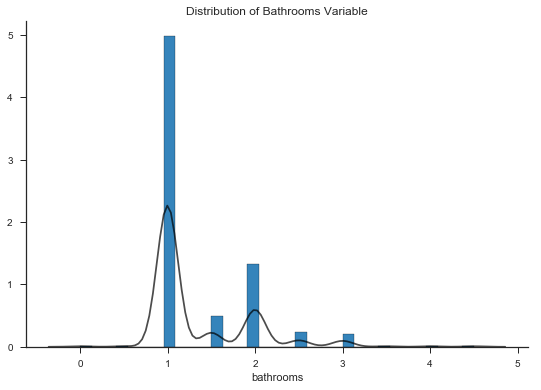

In [15]:
# To gain insight on the distribution of the response 'bathrooms' by plotting a histogram
from statlearning import plot_histogram
plot_histogram(training_data['bathrooms'])
plt.title('Distribution of Bathrooms Variable')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


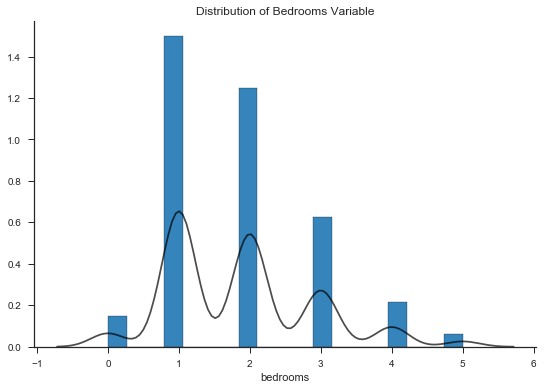

In [16]:
# To gain insight on the distribution of the response 'bedrooms' by plotting a histogram
from statlearning import plot_histogram
plot_histogram(training_data['bedrooms'])
plt.title('Distribution of Bedrooms Variable')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


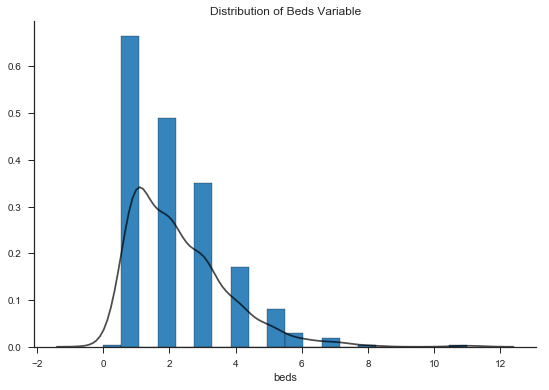

In [17]:
# To gain insight on the distribution of the response 'accommodates' by plotting a histogram
from statlearning import plot_histogram
plot_histogram(training_data['beds'])
plt.title('Distribution of Beds Variable')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


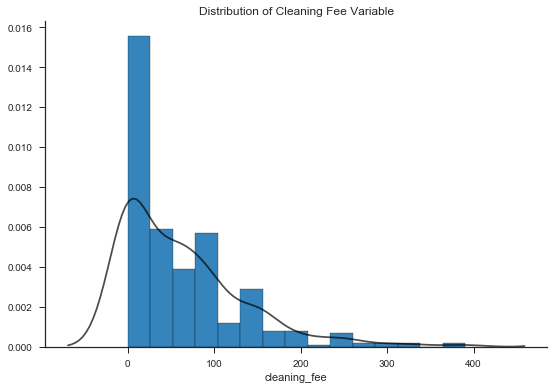

In [18]:
# To gain insight on the distribution of the response 'Cleaning Fee' by plotting a histogram
from statlearning import plot_histogram
plot_histogram(training_data['cleaning_fee'])
plt.title('Distribution of Cleaning Fee Variable')
plt.show()

Insights: majority of listings does not require cleaning_fee.